# News Mood - _Analysing the News Twitter Sentiment_

#### Loading the dependencies & Setting Authentication

In [45]:
# Dependencies
import json
import tweepy 
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime,date
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [22]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

#### Variable Declaration

In [87]:
# Variable for max_id
oldest_tweet = None

# Counter
counter = 1

#Todays date
today = str(date.today())

#Average Polarity Scores
polarityAvgCalculator = []
polorityAvg = []

In [6]:
#Storing the twitter ID list
twitterIDList = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes" ]

#### Looping & Iteration for dataframe creation

In [88]:
# Get all tweets from home feed
tweetList = []

#Iterate the list of News Channel ID
for id in twitterIDList:
    counter = 1 # Set the counter to 1 for each News ID
    for x in range(1,6): #The range is used to grab the latest 100 tweets
        public_tweets = api.user_timeline(id, max_id = oldest_tweet)#API Call, to pull in the latest 20 tweets
        for tweet in public_tweets:#Loop in the 20 tweets and get set for storing it in a dictionary
            tweet_datetime = datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
            results = analyzer.polarity_scores(tweet["text"])
            #Add the necessarty values from the API response into a dictionary
            tweetList.append({"News Channel": id,
                              "News Time" : tweet_datetime,
                              "News text": tweet["text"],
                              "Tweet ID" : tweet["id"],
                              "Sentiment" : results["compound"],
                              "Tweet Ago": counter})
            #Make sure we set this counter, so that the next API call, picks up the next latest 20
            oldest_tweet = tweet['id'] - 1
            counter += 1 #incrementing the counter
            polarityAvgCalculator.append(results["compound"])
    polorityAvg.append(np.mean(polarityAvgCalculator))
    polarityAvgCalculator = []

In [90]:
#Add the dictionary to the dataframe
newsDf = pd.DataFrame(tweetList)

#### Scatter Plots

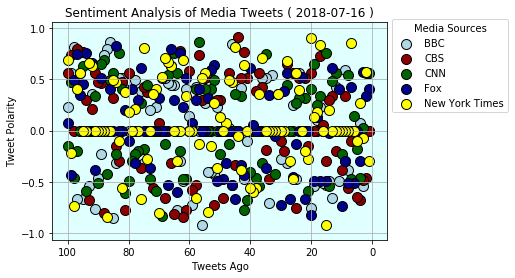

In [85]:
fig, ax = plt.subplots()

#BBC
ax.scatter(newsDf[newsDf["News Channel"] == "@BBCWorld"]['Tweet Ago'], 
           newsDf[newsDf["News Channel"] == "@BBCWorld"]['Sentiment'],  
           c='lightblue', 
           alpha=1, 
           s= 100,
           linewidths =1,
           edgecolor='black', 
           label='BBC')

#CBS
ax.scatter(newsDf[newsDf["News Channel"] == "@CBSNews"]['Tweet Ago'], 
           newsDf[newsDf["News Channel"] == "@CBSNews"]['Sentiment'],  
           c='darkred', 
           alpha=1, 
           s= 100,
           linewidths =1,
           edgecolor='black', 
           label='CBS')

#CNN
ax.scatter(newsDf[newsDf["News Channel"] == "@CNN"]['Tweet Ago'], 
           newsDf[newsDf["News Channel"] == "@CNN"]['Sentiment'],  
           c='darkgreen', 
           alpha=1, 
           s= 100,
           linewidths =1,
           edgecolor='black', 
           label='CNN')

#CBS
ax.scatter(newsDf[newsDf["News Channel"] == "@FoxNews"]['Tweet Ago'], 
           newsDf[newsDf["News Channel"] == "@FoxNews"]['Sentiment'],  
           c='darkblue', 
           alpha=1, 
           s= 100,
           linewidths =1,
           edgecolor='black', 
           label='Fox')

#NY Times
ax.scatter(newsDf[newsDf["News Channel"] == "@nytimes"]['Tweet Ago'], 
           newsDf[newsDf["News Channel"] == "@nytimes"]['Sentiment'],  
           c='yellow', 
           alpha=1, 
           s= 100,
           linewidths =1,
           edgecolor='black', 
           label='New York Times')
#Setting the Title of the scatter plot
plt.title("Sentiment Analysis of Media Tweets ( " + str(today) + " )")

#Setting the X and Y axis of scatter plot
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Legend
#Moving the legends outside the plot
ax.legend(title="Media Sources",loc='center left', bbox_to_anchor=(1, 0.80))

#Changing the X Axis Sort
plt.xlim([105,-5])

#Y Axis Interval
plt.yticks(np.arange(-1,1.5,0.5))

#Gridding the scatter plot
plt.grid()

#Setting Background Color of the Plot
ax.patch.set_facecolor("lightcyan")

#Show the plot
plt.show()

#### Box plot

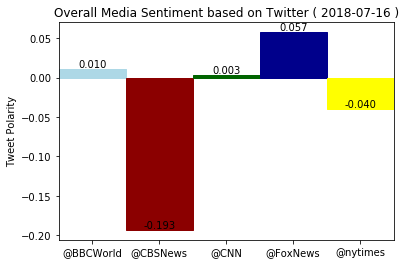

In [132]:
ax = plt.subplot(111)

#Bar plotting the twitter ID and Polarity Score
barPlot = plt.bar(twitterIDList,polorityAvg,width=1.0,align='center')

#Coloring the bar plot
barPlot[0].set_color('lightblue')
barPlot[1].set_color('darkred')
barPlot[2].set_color('darkgreen')
barPlot[3].set_color('darkblue')
barPlot[4].set_color('yellow')

#Setting the X scale
plt.xlim([-0.5,4.5])

#Annotating the Bar plot
rects = ax.patches

counterAxis = 0
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,"{0:.3f}".format(polorityAvg[counterAxis]), ha='center', va='bottom')
    counterAxis = counterAxis + 1

#Y Axis & Title
ax.set_ylabel('Tweet Polarity')
ax.set_title("Overall Media Sentiment based on Twitter ( " + str(today) + " )")

plt.show()


